In [1]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
import re
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

pd.set_option('max_colwidth', 800)

In [2]:
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from langdetect import detect
stop_words = stopwords.words('english')

In [3]:
rev = pd.read_csv("yelp_reviews_Restaurant_AZ.csv")

In [4]:
rev.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,user_id,review_stars,text,date,AZ_state
0,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032.0,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0', 'Wednesday': '10:0-21:0', 'Thursday': '10:0-21:0', 'Friday': '10:0-21:0', 'Saturday': '10:0-21:0', 'Sunday': '11:0-18:0'}",7C4B2Skmh4X9f8xJDo9O4w,5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08 08:44:17,True
1,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308.0,33.640391,-112.187028,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",NaN,-MpNNYmecoWws3Jp0Tn-aA,5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09 22:55:07,True
2,xFc50drSPxXkcLvX5ygqrg,Boomer's Sweet Home Chicago,"5932 W Bell Rd, Ste D-109",Glendale,AZ,85308.0,33.640391,-112.187028,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",NaN,ivTMEVdpZOeFOLtBY_cH9g,5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one wo

In [5]:
rev.shape

(1442738, 19)

In [6]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442738 entries, 0 to 1442737
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   business_id   1442738 non-null  object 
 1   name          1442738 non-null  object 
 2   address       1439184 non-null  object 
 3   city          1442738 non-null  object 
 4   state         1442738 non-null  object 
 5   postal_code   1442513 non-null  float64
 6   latitude      1442738 non-null  float64
 7   longitude     1442738 non-null  float64
 8   stars         1442738 non-null  float64
 9   review_count  1442738 non-null  int64  
 10  is_open       1442738 non-null  int64  
 11  attributes    1441993 non-null  object 
 12  categories    1442738 non-null  object 
 13  hours         1387001 non-null  object 
 14  user_id       1442738 non-null  object 
 15  review_stars  1442738 non-null  int64  
 16  text          1442738 non-null  object 
 17  date          1442738 non-n

In [7]:
rev.isnull().sum()

business_id         0
name                0
address          3554
city                0
state               0
postal_code       225
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes        745
categories          0
hours           55737
user_id             0
review_stars        0
text                0
date                0
AZ_state            0
dtype: int64

In [8]:
# Dropping irrelevant columns from dataframe

In [9]:
rev.drop(['business_id','address','postal_code','state',
          'hours','user_id','AZ_state','latitude','longitude'],axis=1,inplace=True)

In [10]:
rev.isnull().sum()

name              0
city              0
stars             0
review_count      0
is_open           0
attributes      745
categories        0
review_stars      0
text              0
date              0
dtype: int64

In [11]:
rev.review_stars.unique()

array([5, 3, 4, 1, 2], dtype=int64)

In [12]:
rev.stars.unique()

array([4. , 3.5, 3. , 2.5, 2. , 4.5, 1.5, 5. , 1. ])

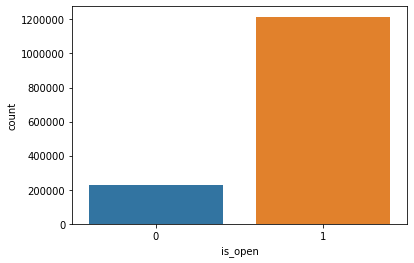

In [13]:
sns.countplot(rev.is_open)

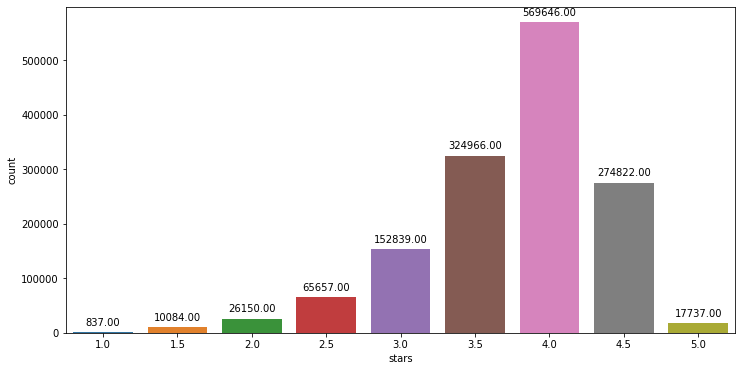

In [14]:
plt.figure(figsize=(12,6))
S1 = sns.countplot(rev.stars)

for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

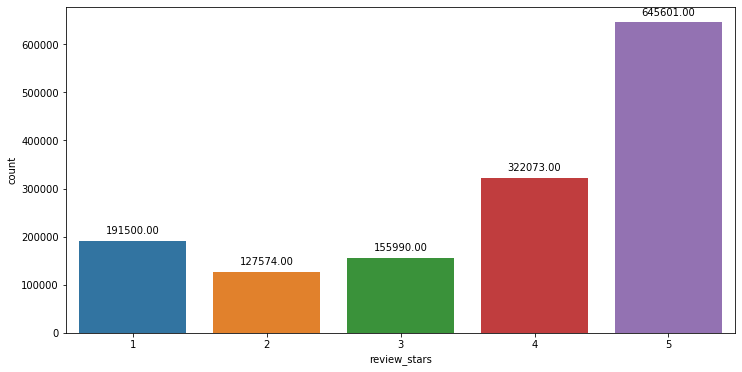

In [15]:
plt.figure(figsize=(12,6))
S1 = sns.countplot(rev.review_stars)

for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

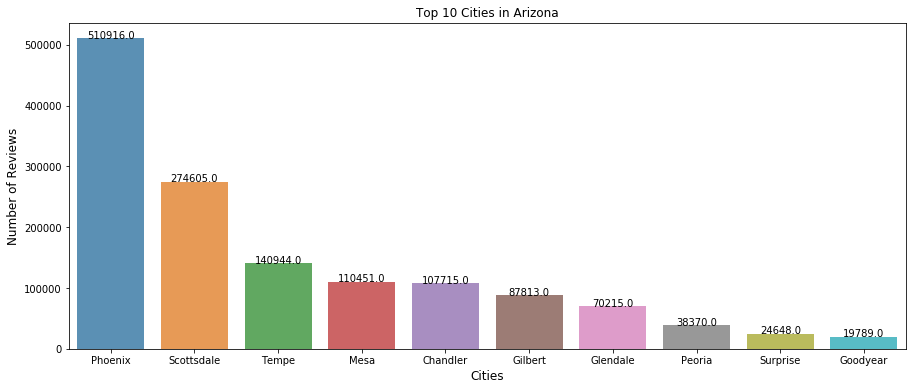

In [16]:
revcity  = rev["city"].value_counts()
revcity = revcity[:10,]
plt.figure(figsize=(15,6))
graph = sns.barplot(revcity.index, revcity.values, alpha=0.8)
plt.title('Top 10 Cities in Arizona')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Cities', fontsize=12)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
plt.show()

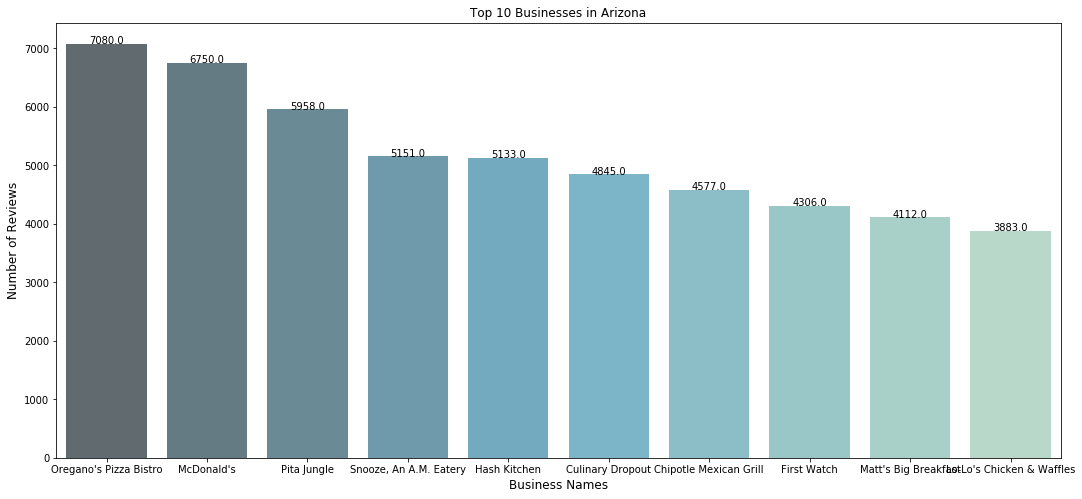

In [17]:
revname  = rev["name"].value_counts()
revname = revname[:10,]
plt.figure(figsize=(18,8))
graph = sns.barplot(revname.index, revname.values, alpha=0.8,palette="GnBu_d")
plt.title('Top 10 Businesses in Arizona')
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlabel('Business Names', fontsize=12)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    
plt.show()

In [18]:
rev['date'] = pd.to_datetime(rev['date'])
rev['date_new'] = rev['date'].dt.date
rev['year'] = rev['date'].dt.year
rev['day'] = rev['date'].dt.day
rev['Weekday'] = rev['date'].apply(lambda time: time.dayofweek)
rev['hour'] = rev['date'].dt.strftime("%H")

In [19]:
rev.drop(['date'],axis=1,inplace=True)

In [20]:
rev.head(2)

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,day,Weekday,hour
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,8,6,08
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011,9,6,22


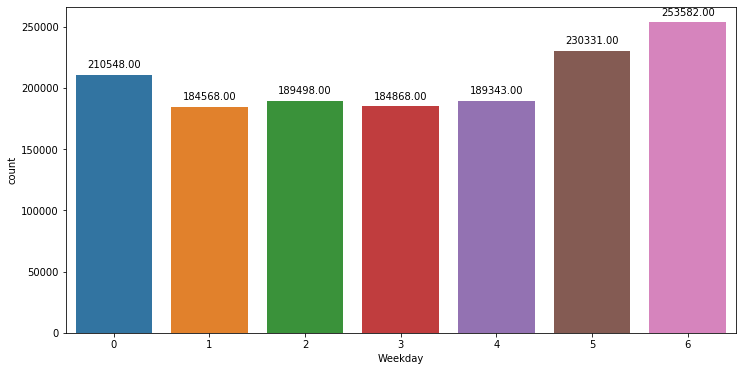

In [21]:
plt.figure(figsize=(12,6))
S1 = sns.countplot(rev.Weekday)

for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

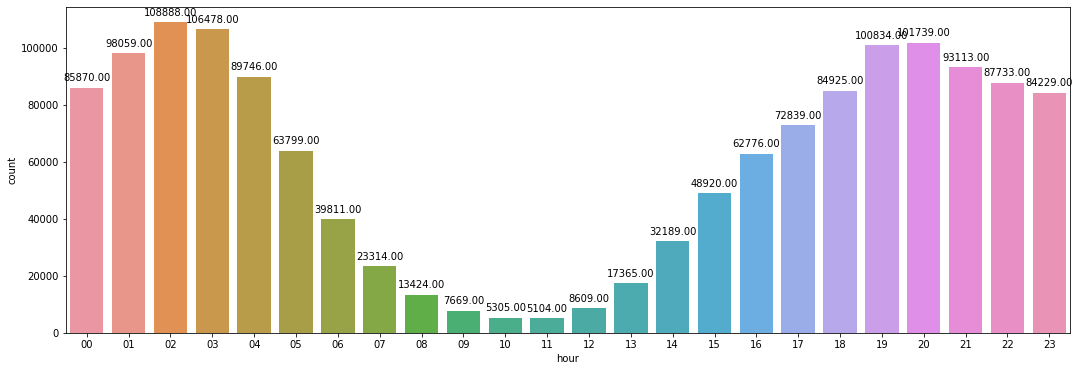

In [22]:
plt.figure(figsize=(18,6))
S1 = sns.countplot(rev.hour)

for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [23]:
# Change of rating of McDonalds over the years

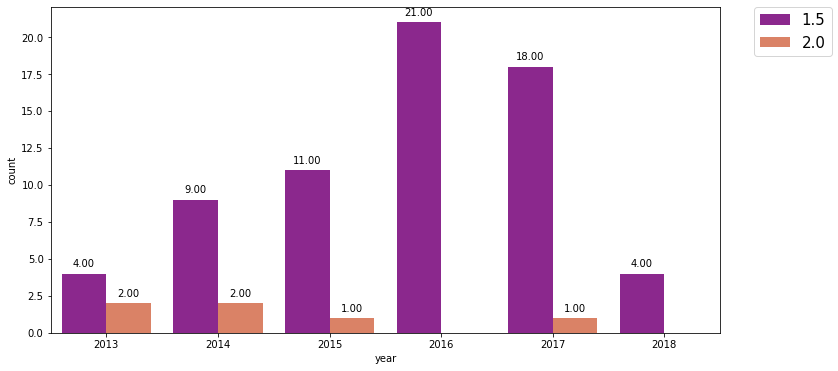

In [24]:
plt.figure(figsize=(12,6))
S1 = sns.countplot(x='year',data=rev[rev['name']=='McDonalds'],hue='stars',palette='plasma')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop=dict(size=15))
for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [25]:
rev['text_length'] = rev['text'].apply(len)
rev.head()

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,day,Weekday,hour,text_length
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,8,6,08,240
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011,9,6,22,557
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one would think by looking at it from the outside. Lot's of Ch...",2009-08-08,2009,8,5,03,1104
3,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast

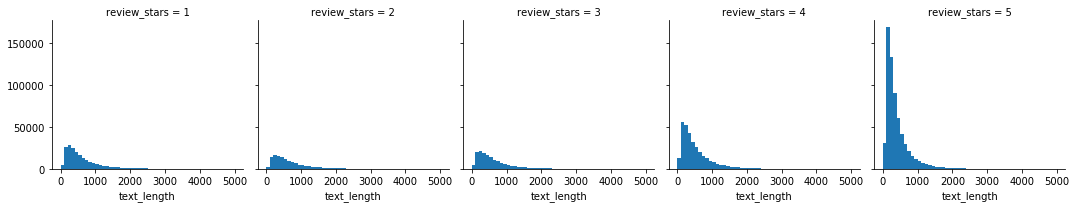

In [26]:
g = sns.FacetGrid(data=rev, col='review_stars')
g.map(plt.hist, 'text_length', bins=50)

The distribution of text length is similar across all five ratings. 
However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. 
This may cause some issues later on in the process

In [27]:
#Adding cuisine for business
rev.loc[rev['categories'].str.contains('American'), 'cuisine'] = 'American'
rev.loc[rev['categories'].str.contains('Mexican'), 'cuisine'] = 'Mexican'
rev.loc[rev['categories'].str.contains('Italian'), 'cuisine'] = 'Italian'
rev.loc[rev['categories'].str.contains('Japanese'), 'cuisine'] = 'Japanese'
rev.loc[rev['categories'].str.contains('Chinese'), 'cuisine'] = 'Chinese'
rev.loc[rev['categories'].str.contains('Middle Eastern'), 'cuisine'] = 'Middle Eastern'
rev.loc[rev['categories'].str.contains('Thai'), 'cuisine'] = 'Thai'
rev.loc[rev['categories'].str.contains('Japanese'), 'cuisine'] = 'Japanese'

In [28]:
rev.isnull().sum()

name                 0
city                 0
stars                0
review_count         0
is_open              0
attributes         745
categories           0
review_stars         0
text                 0
date_new             0
year                 0
day                  0
Weekday              0
hour                 0
text_length          0
cuisine         444388
dtype: int64

In [29]:
rev.shape

(1442738, 16)

In [30]:
rev['cuisine'].fillna('Fast Food',inplace=True)

In [31]:
rev.isnull().sum()

name              0
city              0
stars             0
review_count      0
is_open           0
attributes      745
categories        0
review_stars      0
text              0
date_new          0
year              0
day               0
Weekday           0
hour              0
text_length       0
cuisine           0
dtype: int64

No handles with labels found to put in legend.


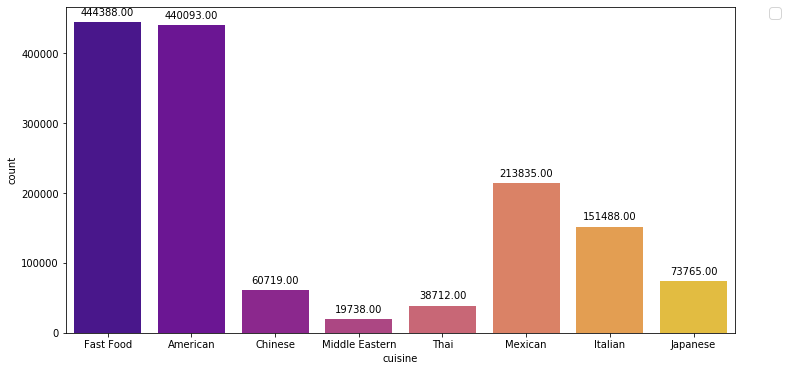

In [32]:
plt.figure(figsize=(12,6))
S1 = sns.countplot(x='cuisine',data=rev,palette='plasma')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop=dict(size=15))
for p in S1.patches:
    S1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Text Pre-processing

In [33]:
gensim.parsing.preprocessing.STOPWORDS
my_stop_words = STOPWORDS.union(set(['weve','ive','nt','hvnt','im','youll','ill','wasnt','will',
                                     'us','came','even','one','got','s','t','nt']))

In [34]:
# # Gensim Text Cleaner
#     # Lower case all words
#     rev['text_new'] = rev['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    
#     # Remove Punctuation and Numbers
#     rev['text_new'] = rev['text_new'].str.replace('[^\w\s]', '')
#     rev['text_new'] = rev['text_new'].str.replace("[^a-zA-Z#]", " ")
    
#     # Remove Stopwords
#     rev['text_new'] = rev['text_new'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words))

In [35]:
# Lower case all words
rev['text_new'] = rev['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [36]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [37]:
rev['text_new'] = rev['text_new'].apply(lambda text: decontracted(text))

In [38]:
def clean_text(text):
    
    # Removal of hashtags
    text = re.sub("#[^\s]*", " ", text)
    
    # Remove Punctuation and Numbers
    text = re.sub("[^\w\s]"," ",text)
    text = re.sub("[^a-zA-Z#]", " ",text)
    text = re.sub("'", "", text)
    return text

In [39]:
rev['text_new'] = rev['text_new'].astype(str)

In [40]:
rev['text_new'] = rev['text_new'].apply(lambda text: clean_text(text))

In [41]:
rev['text_new'] = rev['text_new'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stop_words)) 

In [43]:
rev.head()

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,day,Weekday,hour,text_length,cuisine,text_new
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,8,6,08,240,Fast Food,love wetzel pretzels always mall download app rewards free pretzel love wetzel bites either salty cinnamon wetzel dog bites okay taste hot dogs
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011,9,6,22,557,American,recently discovered place wish discovered sooner hot dogs die perfectly snappy traditional chicago fixin poppy seed bun yum love fries served generous sized portions always come hot fresh crisp italian beef heck sandwich tender meat lots peppers delicious bread au jus girls huge fans sliders quite standard absolute favorite white castles still tasty
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than one would think 

In [44]:
# Calculate word count
rev['word_count'] = rev['text_new'].apply(lambda x: len(str(x).split(" ")))

In [45]:
rev.head()

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,day,Weekday,hour,text_length,cuisine,text_new,word_count
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,8,6,08,240,Fast Food,love wetzel pretzels always mall download app rewards free pretzel love wetzel bites either salty cinnamon wetzel dog bites okay taste hot dogs,23
1,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"We just recently discovered this place and I just wish we have discovered it sooner!\n\nThe hot dogs are to die for! They are perfectly snappy with all the traditional Chicago fixin's on poppy seed bun. Yum!\n\nI love the fries which are served in generous sized portions and always come out so hot, fresh, and crisp! \n\nThe Italian Beef is a heck of a sandwich with tender meat, lots of peppers, delicious bread, and au jus!\n\nMy girls and I are huge fans of their sliders. Not quite up to the standard of my absolute favorite White Castles but still very tasty!",2011-01-09,2011,9,6,22,557,American,recently discovered place wish discovered sooner hot dogs die perfectly snappy traditional chicago fixin poppy seed bun yum love fries served generous sized portions always come hot fresh crisp italian beef heck sandwich tender meat lots peppers delicious bread au jus girls huge fans sliders quite standard absolute favorite white castles still tasty,53
2,Boomer's Sweet Home Chicago,Glendale,3.5,12,0,"{'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'GoodForKids': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'RestaurantsPriceRange2': '1', 'Alcohol': ""u'none'"", 'OutdoorSeating': 'False'}","Burgers, Fast Food, American (New), Restaurants, Hot Dogs",5,"I can't believe I never knew about a place that is a mere five minutes away from me, in a complex that I shop at frequently, until earlier today. I found all the reviews from here very tempting, and so too were the prices. \n\nI ordered a Chicago dog and two cheese sliders, both with everything on them. The dog was THE BEST Chicago dog I've had in Arizona, and I've lived here for 22 years. However, the hot dog was not the pinnacle of my meal. The cheese sliders were A-MAZING. The best I've ever had...anywhere. They were slightly bigger than I expected, but I wished I had ordered more when I was done with them.\n\nI took advantage of their take-out, since I dined alone, but the actual dining area is a lot bigger than

In [46]:
# Return frequency of values
freq = pd.Series(" ".join(rev['text_new']).split()).value_counts()[:30]

In [47]:
freq

food          1073791
good           827559
place          798757
great          697211
service        561572
time           446745
back           445216
go             382647
really         343157
ordered        311366
order          307962
restaurant     277694
chicken        275890
love           261382
best           252220
delicious      248254
nice           240810
always         238368
try            237289
menu           231983
well           229611
pizza          219248
friendly       218818
staff          211542
little         207007
first          204260
amazing        203981
definitely     192074
come           189421
never          188717
dtype: int64

In [48]:
# Create new column "Target" that stored 0's or 1's. 0 being Negative, 1 being Positive
rev["Target"] = np.where(rev["review_stars"] > 3, 1, 0)
rev.head(1)

,name,city,stars,review_count,is_open,attributes,categories,review_stars,text,date_new,year,day,Weekday,hour,text_length,cuisine,text_new,word_count,Target
0,Wetzel's Pretzels,Phoenix,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': 'True', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'False', 'BikeParking': 'True', 'RestaurantsAttire': ""u'casual'"", 'RestaurantsReservations': 'False', 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsGoodForGroups': 'True', 'Alcohol': ""u'none'"", 'RestaurantsDelivery': 'False', 'HasTV': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}""}","Food, Pretzels, Bakeries, Fast Food, Restaurants",5,"Love Wetzel's pretzels! I always get them when I'm at the mall! \n\nIf you download their app you get rewards for a free pretzel. \n\nI love the Wetzel's bites either salty or cinnamon. The Wetzel's dog bites are okay, they taste like hot dogs.",2018-07-08,2018,8,6,08,240,Fast Food,love wetzel pretzels always mall download app rewards free pretzel love wetzel bites either salty cinnamon wetzel dog bites okay taste hot dogs,23,1


In [49]:
# Picking the only text and target column
rev_final = rev[['text_new','Target']]

In [16]:
rev_final.head(5)

,text_new,Target
0,love wetzel s pretzels i always get them when i m at the mall if you download their app you get rewards for a free pretzel i love the wetzel s bites either salty or cinnamon the wetzel s dog bites are okay they taste like hot dogs,1
1,we just recently discovered this place and i just wish we have discovered it sooner the hot dogs are to die for they are perfectly snappy with all the traditional chicago fixin s on poppy seed bun yum i love the fries which are served in generous sized portions and always come out so hot fresh and crisp the italian beef is a heck of a sandwich with tender meat lots of peppers delicious bread and au jus my girls and i are huge fans of their sliders not quite up to the standard of my absolute favorite white castles but still very tasty,1
2,i can t believe i never knew about a place that is a mere five minutes away from me in a complex that i shop at frequently until earlier today i found all the reviews from here very tempting and so too were the prices i ordered a chicago dog and two cheese sliders both with everything on them the dog was the best chicago dog i ve had in arizona and i ve lived here for years however the hot dog was not the pinnacle of my meal the cheese sliders were a mazing the best i ve ever had anywhere they were slightly bigger than i expected but i wished i had ordered more when i was done with them i took advantage of their take out since i dined alone but the actual dining area is a lot bigger than one would think by looking at it from the outside lot s of chicago memorabil...,1
3,the one thing keeping this place from getting stars steam the facking buns for chrissakes if the slider meat would have been cooked fresh and buns steamed would have been a great meal but a cold slider bun sucks ass,0
4,we ve tried a few different chinese delivery places i ll admit i m not a huge fan of chinese food but this place had some good food i like the shrimp lo mein and kung pow shrimp the shrimp was juicy unlike some other places we tried it is also a good price with huge portions don t order the poo poo platter though none of the items in it were good,1


In [50]:
rev_final.to_csv('Review_final.csv',index=False)